Key topics:
- One hot encoding using pandas
- Implement Decision Tree, Random Forest uisng scikit-learn
- Implement XGBoost models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
RANDOM_SEED = 55

In [3]:
# Load the dataset
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
# One hot encoding using pandas
# These are categorical, so must need one-hot encode them
cat_variables = ['Sex',
                 'ChestPainType',
                 'RestingECG',
                 'ExerciseAngina',
                 'ST_Slope']


In [7]:
df = pd.get_dummies(data=df,
                    prefix = cat_variables,
                    columns = cat_variables)

In [8]:
x = [1, 2, 3, 4, 5, 7, 9, 0, 5, 5]
v = [i for i in x if i == 5]
print(v)

[5, 5, 5]


In [9]:
var = [x for x in df.columns if x != 'HeartDisease']
print(var)
print(len(var))

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
20


In [10]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[var], df['HeartDisease'],
    test_size=0.2, random_state=RANDOM_SEED,
    shuffle = True
)

In [11]:
print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Target proportion: {sum(y_train)/len(y_train):.4f}")

Train samples: 734
Test samples: 184
Target proportion: 0.5518


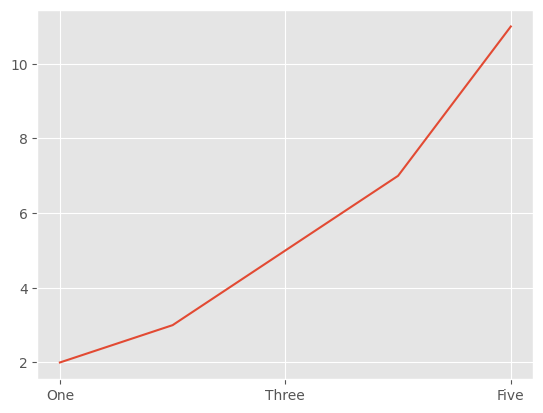

In [12]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.xticks([1, 3, 5], ['One', 'Three', 'Five'])
plt.show()

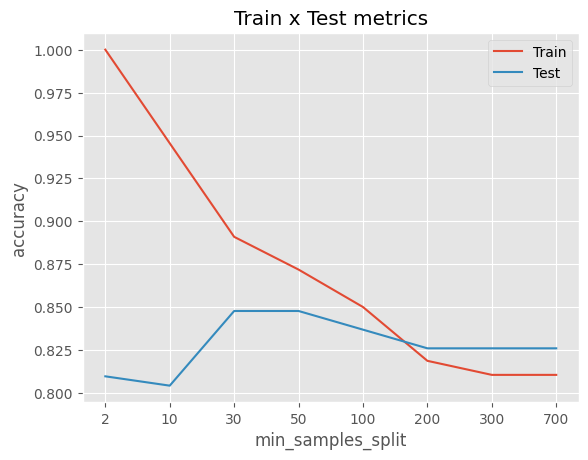

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,

accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_SEED).fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_accuracy = accuracy_score(train_preds, y_train)
    test_accuracy = accuracy_score(test_preds, y_test)
    accuracy_list_train.append(train_accuracy)
    accuracy_list_test.append(test_accuracy)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Test'])

In [14]:
decision_tree_model_sample_split = DecisionTreeClassifier(min_samples_split=50,
                                                          random_state=42).fit(X_train,y_train)


In [15]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model_sample_split.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model_sample_split.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8719
Metrics test:
	Accuracy score: 0.8478


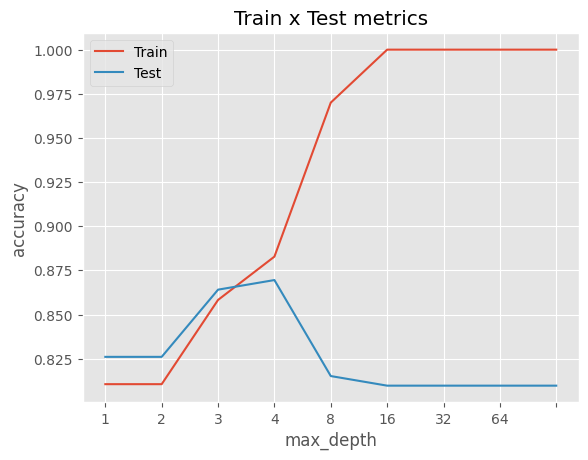

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
train_accuracy_list = []
test_accuracy_list = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth,
                           random_state=RANDOM_SEED)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_accuracy = accuracy_score(train_preds, y_train)
    test_accuracy = accuracy_score(test_preds, y_test)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),
           labels=max_depth_list)
plt.plot(train_accuracy_list)
plt.plot(test_accuracy_list)
plt.legend(['Train', 'Test'])
plt.show()

In [17]:
decision_tree_model = DecisionTreeClassifier(
    min_samples_split=50,
    max_depth=3,
    random_state=RANDOM_SEED
)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=55)

In [18]:
print(f'Metrics train: \n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4}')
print(f'Metrics test : \n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4}')

Metrics train: 
	Accuracy score: 0.8583
Metrics test : 
	Accuracy score: 0.8641


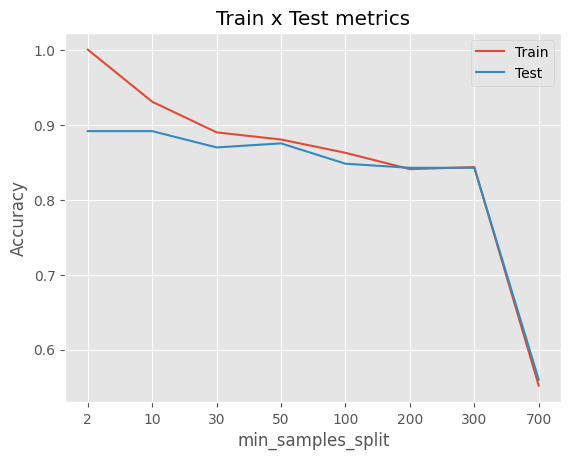

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
RANDOM_SEED = 55

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
train_accuracy_list1 = []
test_accuracy_list1 = []

for min_samples_split in min_samples_split_list:
    model1=RandomForestClassifier(min_samples_split=min_samples_split,
                           random_state=RANDOM_SEED)
    model1.fit(X_train, y_train)
    train_prediction1 = model1.predict(X_train)
    test_prediction1 = model1.predict(X_test)
    train_accuracy1 = accuracy_score(train_prediction1, y_train)
    test_accuracy1 = accuracy_score(test_prediction1, y_test)
    train_accuracy_list1.append(train_accuracy1)
    test_accuracy_list1.append(test_accuracy1)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),
           labels=min_samples_split_list)
plt.plot(train_accuracy_list1)
plt.plot(test_accuracy_list1)
plt.legend(['Train', 'Test'])
plt.show()

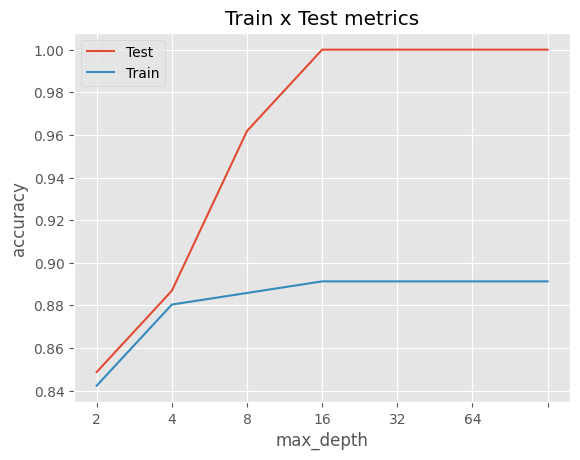

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
RANDOM_SEED = 55

max_depth_list = [2, 4, 8, 16, 32, 64, None]
train_accuracy_list2 = []
test_accuracy_list2 = []

for max_depth in max_depth_list:
    model2 = RandomForestClassifier(
        max_depth=max_depth,
        random_state=RANDOM_SEED
    )
    model2.fit(X_train, y_train)
    train_prediction2 = model2.predict(X_train)
    test_prediction2 = model2.predict(X_test)
    train_accuracy2 = accuracy_score(train_prediction2,y_train)
    test_accuracy2 = accuracy_score(test_prediction2,y_test)
    train_accuracy_list2.append(train_accuracy2)
    test_accuracy_list2.append(test_accuracy2)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),
           labels=max_depth_list)
plt.plot(train_accuracy_list2)
plt.plot(test_accuracy_list2)
plt.legend(['Test', 'Train'])
plt.show()

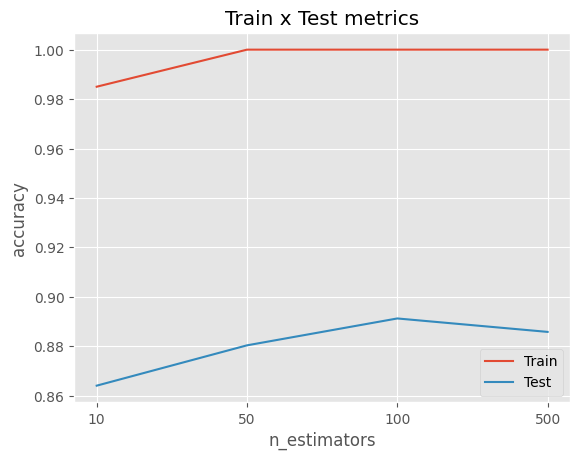

In [21]:
n_estimators_list = [10,50,100,500]
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_SEED).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

* max_depth: 8
* min_samples_split: 50
* n_estimators: 100

In [22]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10
)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10)

In [23]:
rfm_train_pred = random_forest_model.predict(X_train)
rfm_test_pred = random_forest_model.predict(X_test)
train_accuracy = accuracy_score(rfm_train_pred, y_train)
test_accuracy = accuracy_score(rfm_test_pred, y_test)
print(f"Metrics train:\n\tAccuracy score: {train_accuracy:.4f}")
print(f"Metrics tes:\n\tAccuracy score: {test_accuracy:.4f}")

Metrics train:
	Accuracy score: 0.9278
Metrics tes:
	Accuracy score: 0.8913


* `XGBoost` implementation:

In [33]:
l = len(X_train)
n = int(l * 0.80)

print(l,n,l-n)

734 587 147


In [34]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n],X_train[n:], y_train[:n], y_train[n:]

In [35]:
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    verbosity=1,
    random_state=RANDOM_SEED,
    early_stopping_rounds=50
)
xgb_model.fit(
    X_train_fit,
    y_train_fit,
    eval_set = [(X_train_eval, y_train_eval)]
)

[0]	validation_0-logloss:0.63301
[1]	validation_0-logloss:0.59553
[2]	validation_0-logloss:0.56612
[3]	validation_0-logloss:0.54186
[4]	validation_0-logloss:0.52348
[5]	validation_0-logloss:0.50610
[6]	validation_0-logloss:0.49371
[7]	validation_0-logloss:0.48365
[8]	validation_0-logloss:0.47321
[9]	validation_0-logloss:0.46537
[10]	validation_0-logloss:0.45999
[11]	validation_0-logloss:0.45620
[12]	validation_0-logloss:0.45482
[13]	validation_0-logloss:0.44974
[14]	validation_0-logloss:0.44494
[15]	validation_0-logloss:0.44072
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43935
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44321
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435
[28]	validation_0-logloss:0.45316
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
xgb_model.best_iteration

17

In [37]:
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)
print(f"Train accuracy score: {train_acc:.4f}")
print(f"Test accuracy score: {test_acc:.4f}")

Train accuracy score: 0.9319
Test accuracy score: 0.8533
